In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the scores, and original full data
# DIR_TITLE = "dmdt_dense_save/"
data_part_one = np.load("dmdt_dense_save/part_1.npy")
data_part_two = np.load("dmdt_dense_save/part_2.npy")
full_data = np.concatenate((data_part_one, data_part_two), axis=0)
# full_data = np.load("dmdt_sparse_save/part_1.npy")

# full_data = np.load("test_images_dense/full_dense_light_curve_points_removed_spikes.npy")

tsne_scores = pd.read_csv("mar_20_results/dense_results/" + "tsne_outlier_scores_dense.csv")
umap_scores = pd.read_csv("mar_20_results/dense_results/" + "umap_outlier_scores_dense.csv")

In [3]:
full_data.shape

(147036, 21, 19)

### TSNE - dense image picking

In [4]:
# dense light curve analysis
tsne_scores

,Unnamed: 0,tsne_outlier_score,light_curve_index
0,0,-0.691766,0
1,1,-0.380334,1
2,2,0.143186,2
3,3,-1.193848,3
4,4,0.177553,4
...,...,...,...
147031,147031,0.513509,147031
147032,147032,0.177077,147032
147033,147033,1.853783,147033
147034,147034,0.252218,147034


In [5]:
tsne_scores.describe()

,Unnamed: 0,tsne_outlier_score,light_curve_index
count,147036.000000,1.470360e+05,147036.000000
mean,73517.500000,-1.102608e-07,73517.500000
std,42445.781428,1.000003e+00,42445.781428
min,0.000000,-1.377683e+00,0.000000
25%,36758.750000,-6.908969e-01,36758.750000
50%,73517.500000,-2.116313e-01,73517.500000
75%,110276.250000,4.518173e-01,110276.250000
max,147035.000000,2.316730e+01,147035.000000


(array([1.41961e+05, 4.67500e+03, 3.25000e+02, 5.40000e+01, 1.00000e+01,
        6.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1.353842 ,  2.0744644,  5.5027708,  8.9310772, 12.3593836,
        15.78769  , 19.2159964, 22.6443028, 26.0726092, 29.5009156,
        32.929222 ]),
 <a list of 10 Patch objects>)

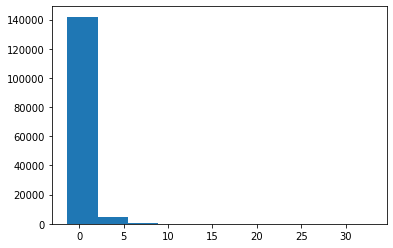

In [20]:
plt.hist(tsne_scores["tsne_outlier_score"])

In [21]:
bins = [0, 1, 3, 5, 10]


In [22]:
lc_indices = []
scores = []

lc_indices.append(tsne_scores[tsne_scores["tsne_outlier_score"] < bins[0]].iloc[1]["light_curve_index"])
scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_indices[-1]]["tsne_outlier_score"]))

for i in range(len(bins) - 1):
    temp = tsne_scores[tsne_scores["tsne_outlier_score"] >= bins[i]]
    temp = temp[temp["tsne_outlier_score"] <= bins[i+1]]
    lc_index = temp.iloc[1]["light_curve_index"]
    lc_indices.append(lc_index)
    scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_index]["tsne_outlier_score"]))
lc_indices.append(tsne_scores[tsne_scores["tsne_outlier_score"] > bins[len(bins) - 1]].iloc[1]["light_curve_index"])
scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_indices[-1]]["tsne_outlier_score"]))

In [23]:
print(lc_indices)
print(scores)

[3.0, 2.0, 19.0, 375.0, 771.0, 9872.0]
[-0.77676827, 0.4129394, 1.6518974999999998, 3.4580127999999997, 6.7557497, 10.258761999999999]


In [6]:
from matplotlib.colors import LogNorm

# dmints = [-0.05, -0.02,-0.01, -0.006, -0.005, -0.004, -0.0012, 
#           -0.001, -0.0006, -0.0003, 0,  0.0003, 0.0006, 0.001, 0.0012, 0.003, 
#           0.004, 0.005, 0.006, 0.01, 0.02, 0.05]
# dtints = [-1.0/145, 1.0/47, 2.0/47, 3.0/47, 4.0/47, 6.0/47, 10.0/47, 15.0/47,
#           20.0/47, 30.0/47, 40.0/47,   1.0,   1.2,  
#            1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0]

dmints = [-0.05, -0.02,-0.01, -0.006, -0.005, -0.004, -0.0012, 
          -0.001, -0.0006, -0.0003, 0,  0.0003, 0.0006, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02, 0.05]
dtints = [-1.0/145, 1.0/47, 2.0/47, 3.0/47, 4.0/47, 6.0/47, 10.0/47, 15.0/47,
          20.0/47, 30.0/47, 40.0/47,   1.0,   1.2,  
           1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0]

xpositions = range(len(dtints))
ypositions = range(len(dmints))
xlabels = ['%.2f' % dt for dt in dtints]
ylabels = ['%.2f' % dm for dm in dmints]


def create_dmdt_plot(lc_indices, dmdt_data, scores, save_title):
    f, axarr = plt.subplots(3, 2, figsize=(10,10))
    row = 0
    for i, lc_index in enumerate(lc_indices):
        col = i % 2
        if col == 0:
            row += 1
        
        print("ON LC " + str(lc_index))
        ar_x = row - 1
        ar_y = col
        score = "%.2f" % scores[i]
        title = "LC: " + str(int(lc_index))
        axarr[ar_x, ar_y].set_title(title)
        
        to_show = dmdt_data[int(lc_index)]
        
        axarr[ar_x, ar_y].imshow(to_show, norm = LogNorm(), origin="lower")
        axarr[ar_x, ar_y].set_xticks([])
        axarr[ar_x, ar_y].set_xticklabels([])
        axarr[ar_x, ar_y].set_yticks([])
        axarr[ar_x, ar_y].set_yticklabels([])
            

#     axarr[2,2].set_visible(True)
    
    plt.tight_layout()
    plt.savefig(save_title, dpi=100)
    plt.close()
        
        
# outliers = [1980, 1799, 1392, 374, 2319, 1970, 386, 947, 1840]



# create_dmdt_plot(lc_indices, full_data, scores, "mar_20_dmdt_plots/dmdt_plots_sparse_random_tsne.ps")

### UMAP - dense image picking


In [38]:
umap_scores

,Unnamed: 0,umap_outlier_score,light_curve_index
0,0,0.320064,0
1,1,1.307683,1
2,2,1.996953,2
3,3,-0.734267,3
4,4,-1.237638,4
...,...,...,...
147031,147031,-0.585255,147031
147032,147032,0.161166,147032
147033,147033,0.634139,147033
147034,147034,1.881548,147034


(array([1.24887e+05, 2.10420e+04, 1.03300e+03, 6.40000e+01, 7.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-1.5273027 ,  0.95697287,  3.44124844,  5.92552401,  8.40979958,
        10.89407515, 13.37835072, 15.86262629, 18.34690186, 20.83117743,
        23.315453  ]),
 <a list of 10 Patch objects>)

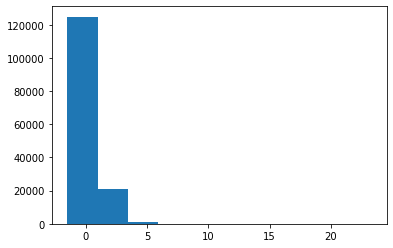

In [39]:
plt.hist(umap_scores["umap_outlier_score"])

In [40]:
bins = [0, 1, 3, 5, 10]
lc_indices = []
scores = []

lc_indices.append(umap_scores[umap_scores["umap_outlier_score"] < bins[0]].iloc[1]["light_curve_index"])
scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_indices[-1]]["umap_outlier_score"]))

for i in range(len(bins) - 1):
    temp = umap_scores[umap_scores["umap_outlier_score"] >= bins[i]]
    temp = temp[temp["umap_outlier_score"] <= bins[i+1]]
    lc_index = temp.iloc[1]["light_curve_index"]
    lc_indices.append(lc_index)
    scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_index]["umap_outlier_score"]))
lc_indices.append(umap_scores[umap_scores["umap_outlier_score"] > bins[len(bins) - 1]].iloc[1]["light_curve_index"])
scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_indices[-1]]["umap_outlier_score"]))



In [41]:
print(lc_indices)
print(scores)

[4.0, 6.0, 2.0, 330.0, 804.0, 65768.0]
[-1.2376382, 0.6217723, 1.9969531000000003, 4.4118414, 6.616692, 10.730572]


In [42]:
create_dmdt_plot(lc_indices, full_data, scores, "mar_20_dmdt_plots/dmdt_plots_dense_random_umap.ps")

ON LC 4.0
ON LC 6.0
ON LC 2.0
ON LC 330.0
ON LC 804.0
ON LC 65768.0


In [19]:
# specific indices

def create_dmdt_plot_seven(lc_indices, dmdt_data, save_title):
    f, axarr = plt.subplots(3, 3, figsize=(8,8))
    row = 0
    for i, lc_index in enumerate(lc_indices[:len(lc_indices) - 1]):
        col = i % 2
        if col == 0:
            row += 1
        
        print("ON LC " + str(lc_index))
        ar_x = row - 1
        ar_y = col
        title = "LC: " + str(int(lc_index))
        axarr[ar_x, ar_y].set_title(title)
        
        to_show = dmdt_data[int(lc_index)]
        
        axarr[ar_x, ar_y].imshow(to_show, norm = LogNorm(), origin="lower")
        axarr[ar_x, ar_y].set_xticks([])
        axarr[ar_x, ar_y].set_xticklabels([])
        axarr[ar_x, ar_y].set_yticks([])
        axarr[ar_x, ar_y].set_yticklabels([])
            

#     axarr[2,2].set_visible(True)
    lc_index = int(lc_indices[len(lc_indices) - 1])
    to_show = dmdt_data[lc_index]
    axarr[1, 2].imshow(to_show, norm = LogNorm(), origin="lower")
    axarr[1, 2].set_xticks([])
    axarr[1, 2].set_xticklabels([])
    axarr[1, 2].set_yticks([])
    axarr[1, 2].set_yticklabels([])
    axarr[1, 2].set_title("LC: " + str(lc_index))
    axarr[2, 2].axis('off')
    axarr[0, 2].axis('off')
    plt.tight_layout()
    plt.savefig(save_title, dpi=100)
    plt.close()
#     plt.show()

def create_dmdt_plot_ten(lc_indices, dmdt_data, save_title):
    f, axarr = plt.subplots(4, 3, figsize=(8,8))
    row = 0
    for i, lc_index in enumerate(lc_indices[:len(lc_indices) - 1]):
        col = i % 3
        if col == 0:
            row += 1
        
        print("ON LC " + str(lc_index))
        ar_x = row - 1
        ar_y = col
        title = "LC: " + str(int(lc_index))
        axarr[ar_x, ar_y].set_title(title)
        
        to_show = dmdt_data[int(lc_index)]
        
        axarr[ar_x, ar_y].imshow(to_show, norm = LogNorm(), origin="lower")
        axarr[ar_x, ar_y].set_xticks([])
        axarr[ar_x, ar_y].set_xticklabels([])
        axarr[ar_x, ar_y].set_yticks([])
        axarr[ar_x, ar_y].set_yticklabels([])
            

#     axarr[2,2].set_visible(True)
    lc_index = int(lc_indices[len(lc_indices) - 1])
    to_show = dmdt_data[lc_index]
    axarr[3, 1].imshow(to_show, norm = LogNorm(), origin="lower")
    axarr[3, 1].set_xticks([])
    axarr[3, 1].set_xticklabels([])
    axarr[3, 1].set_yticks([])
    axarr[3, 1].set_yticklabels([])
    axarr[3, 1].set_title("LC: " + str(lc_index))
    axarr[3, 0].axis('off')
    axarr[3, 2].axis('off')
    plt.tight_layout()
    plt.savefig(save_title, dpi=100)
    plt.close()
    
# create_dmdt_plot_seven(lc_indices, full_data, "full_outliers_dense/dmdt_plots_dense_specified_indices.ps")

# lc_indices = [71714, 93480, 83709, 133288, 31188, 143272, 18527, 135984, 42399, 44485]
lc_indices = [113556, 104988, 90850, 126500, 51929, 5162, 74292, 35273, 12971, 105859]

create_dmdt_plot_ten(lc_indices, full_data, "mar_20_dmdt_plots/dmdt_plots_concat_dense_specified_indices_part_two.ps")

ON LC 113556
ON LC 104988
ON LC 90850
ON LC 126500
ON LC 51929
ON LC 5162
ON LC 74292
ON LC 35273
ON LC 12971


In [71]:
## tabbys star
TABBY_STAR_INDEX = 0
plt.imshow(full_data[TABBY_STAR_INDEX], norm=LogNorm(), origin="Lower")

title = "Tabby's Star (Dense)"
plt.title(title)
plt.xticks(xpositions, xlabels, rotation="vertical")
plt.yticks(ypositions, ylabels)
plt.tight_layout()
plt.savefig("new_new_new_final_images/dmdt_images/tabby_dense.ps", dpi=100)
plt.close()

### TSNE - sparse image picking

In [72]:
# load the scores, and original full data
full_data = np.load("sparse_light_curve_dmdt_final/full_sparse_light_curve_points_removed_spikes.npy")

DIR_TITLE = "june_14_images/"
tsne_scores = pd.read_csv(DIR_TITLE + "tsne_outlier_scores.csv")
umap_scores = pd.read_csv(DIR_TITLE + "umap_outlier_scores.csv")

In [73]:
tsne_scores.describe()

,Unnamed: 0,tsne_outlier_score,light_curve_index
count,2500.00000,2.500000e+03,2500.00000
mean,1249.50000,1.321212e-07,1249.50000
std,721.83216,1.000200e+00,721.83216
min,0.00000,-1.805012e+00,0.00000
25%,624.75000,-6.782405e-01,624.75000
50%,1249.50000,-9.048525e-02,1249.50000
75%,1874.25000,5.400390e-01,1874.25000
max,2499.00000,7.021760e+00,2499.00000


(array([442., 873., 752., 310.,  84.,  27.,   7.,   2.,   0.,   3.]),
 array([-1.8050123 , -0.92233502, -0.03965774,  0.84301954,  1.72569682,
         2.6083741 ,  3.49105138,  4.37372866,  5.25640594,  6.13908322,
         7.0217605 ]),
 <a list of 10 Patch objects>)

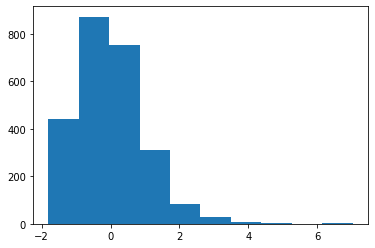

In [74]:
plt.hist(tsne_scores["tsne_outlier_score"])

In [75]:
bins = [-1, 0, 1, 2, 6]

lc_indices = []
scores = []

lc_indices.append(tsne_scores[tsne_scores["tsne_outlier_score"] < bins[0]].iloc[1]["light_curve_index"])
scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_indices[-1]]["tsne_outlier_score"]))

for i in range(len(bins) - 1):
    temp = tsne_scores[tsne_scores["tsne_outlier_score"] >= bins[i]]
    temp = temp[temp["tsne_outlier_score"] <= bins[i+1]]
    lc_index = temp.iloc[1]["light_curve_index"]
    lc_indices.append(lc_index)
    scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_index]["tsne_outlier_score"]))
lc_indices.append(tsne_scores[tsne_scores["tsne_outlier_score"] > bins[len(bins) - 1]].iloc[1]["light_curve_index"])
scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_indices[-1]]["tsne_outlier_score"]))

In [76]:
print(lc_indices)
print(scores)

[5.0, 9.0, 7.0, 20.0, 3.0, 1317.0]
[-1.6493415, -0.49475765, 0.43354923, 1.7025631999999997, 3.327803, 6.757254]


In [77]:
dmints = [-0.05, -0.02,-0.01, -0.006, -0.005, -0.004, -0.0012, 
          -0.001, -0.0006, -0.0003, 0,  0.0003, 0.0006, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02, 0.05]
dtints = [-1.0/145, 1.0/47, 2.0/47, 3.0/47, 4.0/47, 6.0/47, 10.0/47, 15.0/47,
          20.0/47, 30.0/47, 40.0/47,   1.0,   1.2,  
           1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0]

xpositions = range(len(dtints))
ypositions = range(len(dmints))
xlabels = ['%.2f' % dt for dt in dtints]
ylabels = ['%.2f' % dm for dm in dmints]

create_dmdt_plot(lc_indices, full_data, scores, "new_new_new_final_images/dmdt_images/tsne_sparse.ps")

ON LC 5.0
ON LC 9.0
ON LC 7.0
ON LC 20.0
ON LC 3.0
ON LC 1317.0


In [78]:
umap_scores.describe()

,Unnamed: 0,umap_outlier_score,light_curve_index
count,2500.00000,2.500000e+03,2500.00000
mean,1249.50000,-6.775724e-08,1249.50000
std,721.83216,1.000200e+00,721.83216
min,0.00000,-1.462530e+00,0.00000
25%,624.75000,-7.560087e-01,624.75000
50%,1249.50000,-2.193230e-01,1249.50000
75%,1874.25000,5.422159e-01,1874.25000
max,2499.00000,5.427856e+00,2499.00000


(array([599., 776., 537., 310., 162.,  67.,  28.,  16.,   4.,   1.]),
 array([-1.4625301 , -0.77349149, -0.08445288,  0.60458573,  1.29362434,
         1.98266295,  2.67170156,  3.36074017,  4.04977878,  4.73881739,
         5.427856  ]),
 <a list of 10 Patch objects>)

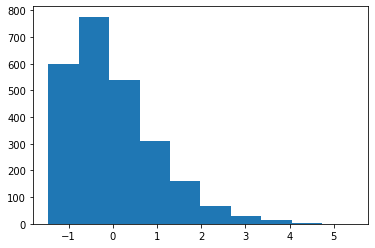

In [79]:
plt.hist(umap_scores["umap_outlier_score"])

In [80]:
bins = [-1, 0, 1, 2, 4]
lc_indices = []
scores = []

lc_indices.append(umap_scores[umap_scores["umap_outlier_score"] < bins[0]].iloc[1]["light_curve_index"])
scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_indices[-1]]["umap_outlier_score"]))

for i in range(len(bins) - 1):
    temp = umap_scores[umap_scores["umap_outlier_score"] >= bins[i]]
    temp = temp[temp["umap_outlier_score"] <= bins[i+1]]
    lc_index = temp.iloc[1]["light_curve_index"]
    lc_indices.append(lc_index)
    scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_index]["umap_outlier_score"]))
lc_indices.append(umap_scores[umap_scores["umap_outlier_score"] > bins[len(bins) - 1]].iloc[1]["light_curve_index"])
scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_indices[-1]]["umap_outlier_score"]))



In [81]:
print(lc_indices)
print(scores)

[17.0, 2.0, 3.0, 42.0, 20.0, 355.0]
[-1.3849847, -0.16631173, 0.33934692, 1.059859, 3.512322, 4.112435]


In [82]:
create_dmdt_plot(lc_indices, full_data, scores, "new_new_new_final_images/dmdt_images/umap_sparse.ps")

ON LC 17.0
ON LC 2.0
ON LC 3.0
ON LC 42.0
ON LC 20.0
ON LC 355.0


In [83]:
## tabbys star
TABBY_STAR_INDEX = 0
plt.imshow(full_data[TABBY_STAR_INDEX], norm=LogNorm(), origin="Lower")

title = "Tabby's Star (Sparse)"
plt.title(title)
plt.xticks(xpositions, xlabels, rotation="vertical")
plt.yticks(ypositions, ylabels)
plt.tight_layout()
plt.savefig("new_new_new_final_images/dmdt_images/tabby_sparse.ps", dpi=100)
plt.close()